In [4]:
!pip install tensorflow --user

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.27.0 requires avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you have avro-python3 1.10.1 which is incompatible.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings
import numpy as np
import cv2
import os
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
path = r'Model/'
train_path = r'F:\\Lecture notes\\Sem-8\MP(8)\\DevanagariHandwrittenCharacterDataset\\Train'
test_path = r'F:\\Lecture notes\\Sem-8\MP(8)\\DevanagariHandwrittenCharacterDataset\\Test'

In [3]:
train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
train_batches = train_data.flow_from_directory(directory=train_path, target_size=(32, 32), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = test_data.flow_from_directory(directory=test_path, target_size=(32, 32), class_mode='categorical', batch_size=10, shuffle=True)

images, labels = next(train_batches)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [4]:
# Plotting the sample images...
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(32, 32))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
# To plot graph of learning rate and accuracy...
def plot_graph():
    plt.plot(history2.history['accuracy'], label='accuracy')
    plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

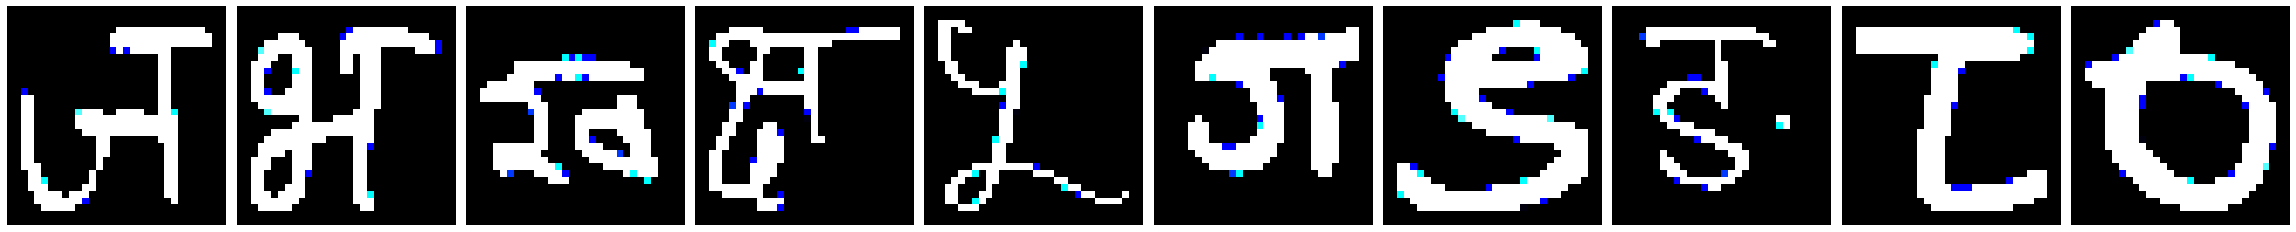

(10, 32, 32, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:

plot_images(images)
print(images.shape)
print(labels)

In [11]:
# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', padding = 'same'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# model.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
# model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# model.add(Flatten())

# model.add(Dense(64,activation ="relu"))
# model.add(Dense(128,activation ="relu"))
# model.add(Dense(128,activation ="relu"))
# model.add(Dense(46,activation ="softmax"))

Model = Sequential()

Model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
Model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
Model.add(MaxPool2D(pool_size=(2, 2), strides=2))
Model.add(Dropout(0.1))
Model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
Model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
Model.add(MaxPool2D(pool_size=(2, 2), strides=2))
Model.add(Dropout(0.1))
Model.add(Flatten())
Model.add(Dense(256,activation ="relu"))
Model.add(Dropout(0.1))
Model.add(Dense(46,activation ="relu"))

In [12]:
Model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

Model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [ ]:
history2 = Model.fit(train_batches, epochs=3, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)
images, labels = next(train_batches) # For getting next batch of images...

images, labels = next(test_batches) # For getting next batch of images...
scores = Model.evaluate(images, labels, verbose=0)
print(f'{Model.metrics_names[0]} of {scores[0]}; {Model.metrics_names[1]} of {scores[1]*100}%')

if not os.path.exists(path):
    os.makedirs(path)
Model.save(path + 'Hindi_Digitizer.h5')

print(history2.history)

images, labels = next(test_batches)

Epoch 1/3
7820/7820 [==============================] - 1767s 224ms/step - loss: 5.6363 - accuracy: 0.0238 - val_loss: 3.5310 - val_accuracy: 0.1921
Epoch 2/3
7820/7820 [==============================] - 594s 76ms/step - loss: 3.3256 - accuracy: 0.1058 - val_loss: 2.4163 - val_accuracy: 0.4246
Epoch 3/3
7820/7820 [==============================] - ETA: 0s - loss: 2.9462 - accuracy: 0.1612

In [21]:
model = keras.models.load_model(path + "Hindi_Digitizer.h5")

scores = model.evaluate(images, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores
model.metrics_names

loss of 0.5375030040740967; accuracy of 89.99999761581421%
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_____________________________________________________________

['loss', 'accuracy']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

3    chha    bha    yna    tabla    ma    Ya    cha    la    dha    

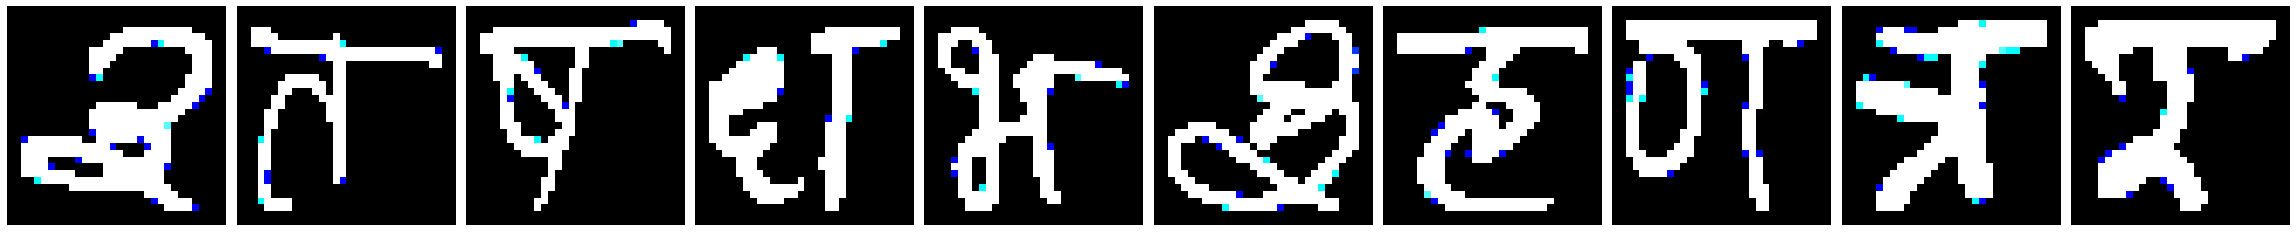

Actual labels
3    chha    bha    yna    tabla    3    Ya    cha    la    dha    (10, 32, 32, 3)


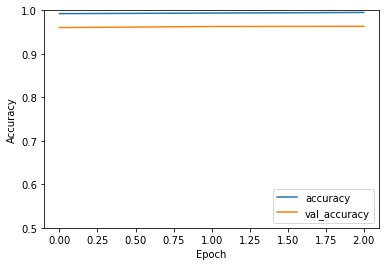

{'loss': [0.025965554639697075, 0.02135470137000084, 0.017457956448197365],
 'accuracy': [0.9924680590629578, 0.9937979578971863, 0.9951790571212769],
 'val_loss': [0.16340216994285583, 0.1664493978023529, 0.16814695298671722],
 'val_accuracy': [0.9604347944259644, 0.9628260731697083, 0.9633333086967468],
 'lr': [0.0005, 0.0005, 0.0005]}

In [22]:
letters = {0:"ka", 1: "kha", 2: "ga", 3: "gha", 4: "kna", 5: "cha", 6: "chha", 7: "ja", 8: "jha", 9: "yna",
           10: "tamatar", 11: "tha", 12: "daa", 13: "dhaa", 14: "adna", 15: "tabla", 16: "thumka", 17: "da", 18: 'dha', 19: 'na',
           20: "pa", 21: "pha", 22: "ba", 23: "bha", 24: "ma", 25: "Ya", 26: "ra", 27: "la", 28 : "waw", 29 : "motosaw", 
           30 : "petchiryakha", 31 : "patalosaw", 32 : "ha", 33 : "chhya", 34 : "tra", 35 : "gya", 36 : "0", 37 : "1", 38 : "2", 39 : "3", 
           40 : "4", 41 : "5", 42 : "6", 43 : "7", 44 : "8", 45 : "9"}

predictions = model.predict(images, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(letters[np.argmax(i)], end="    ")

plot_images(images)
print('Actual labels')
for i in labels:
    print(letters[np.argmax(i)], end="    ")
print(images.shape)
plot_graph()
history2.history

In [4]:
img = cv2.imread('ka.jpeg')

In [6]:
print(img.shape)

(59, 141, 3)


In [ ]:
cv2.resize()